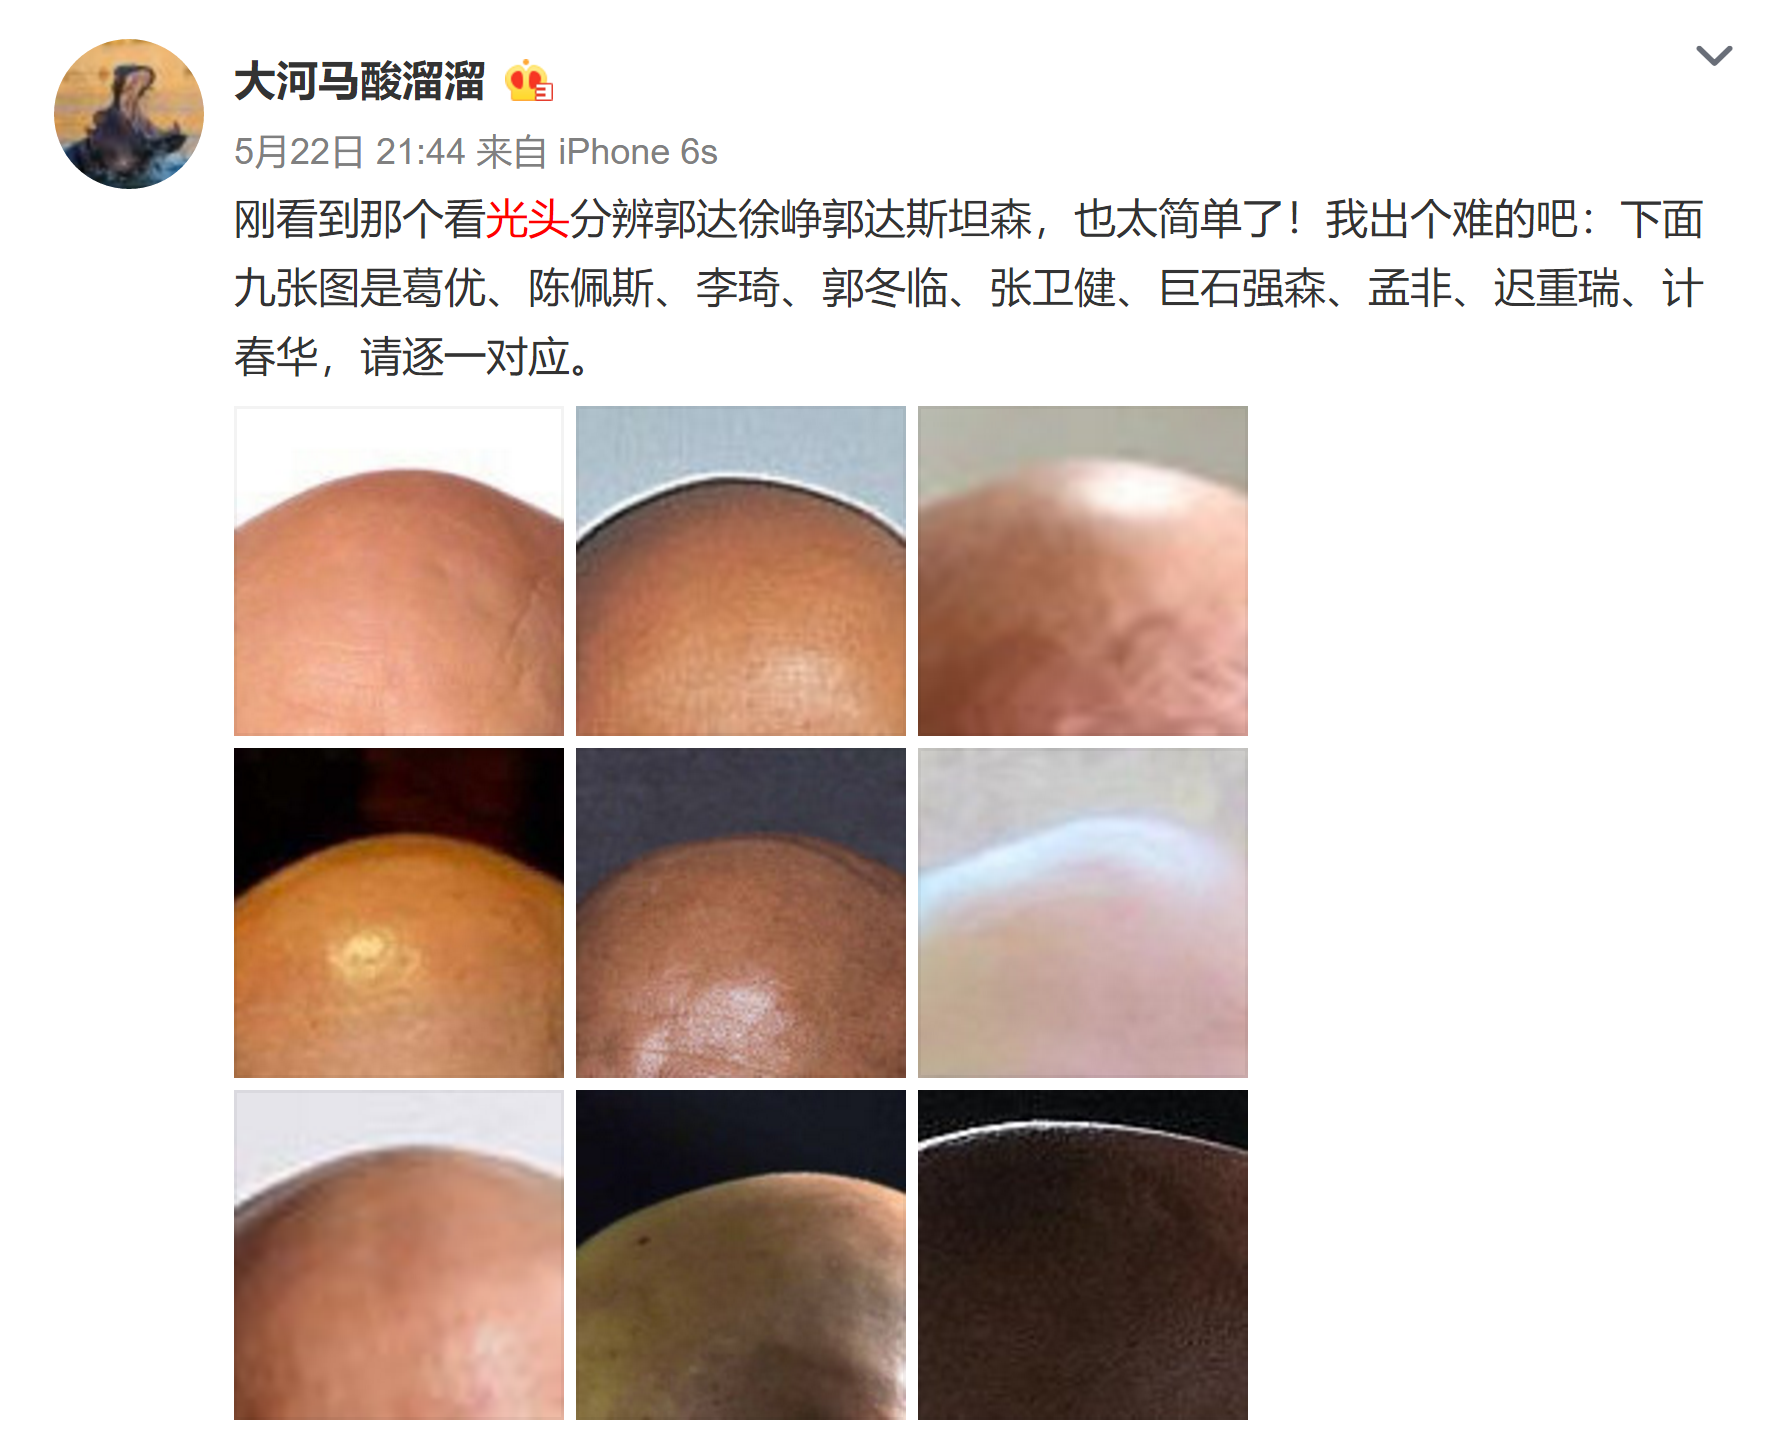

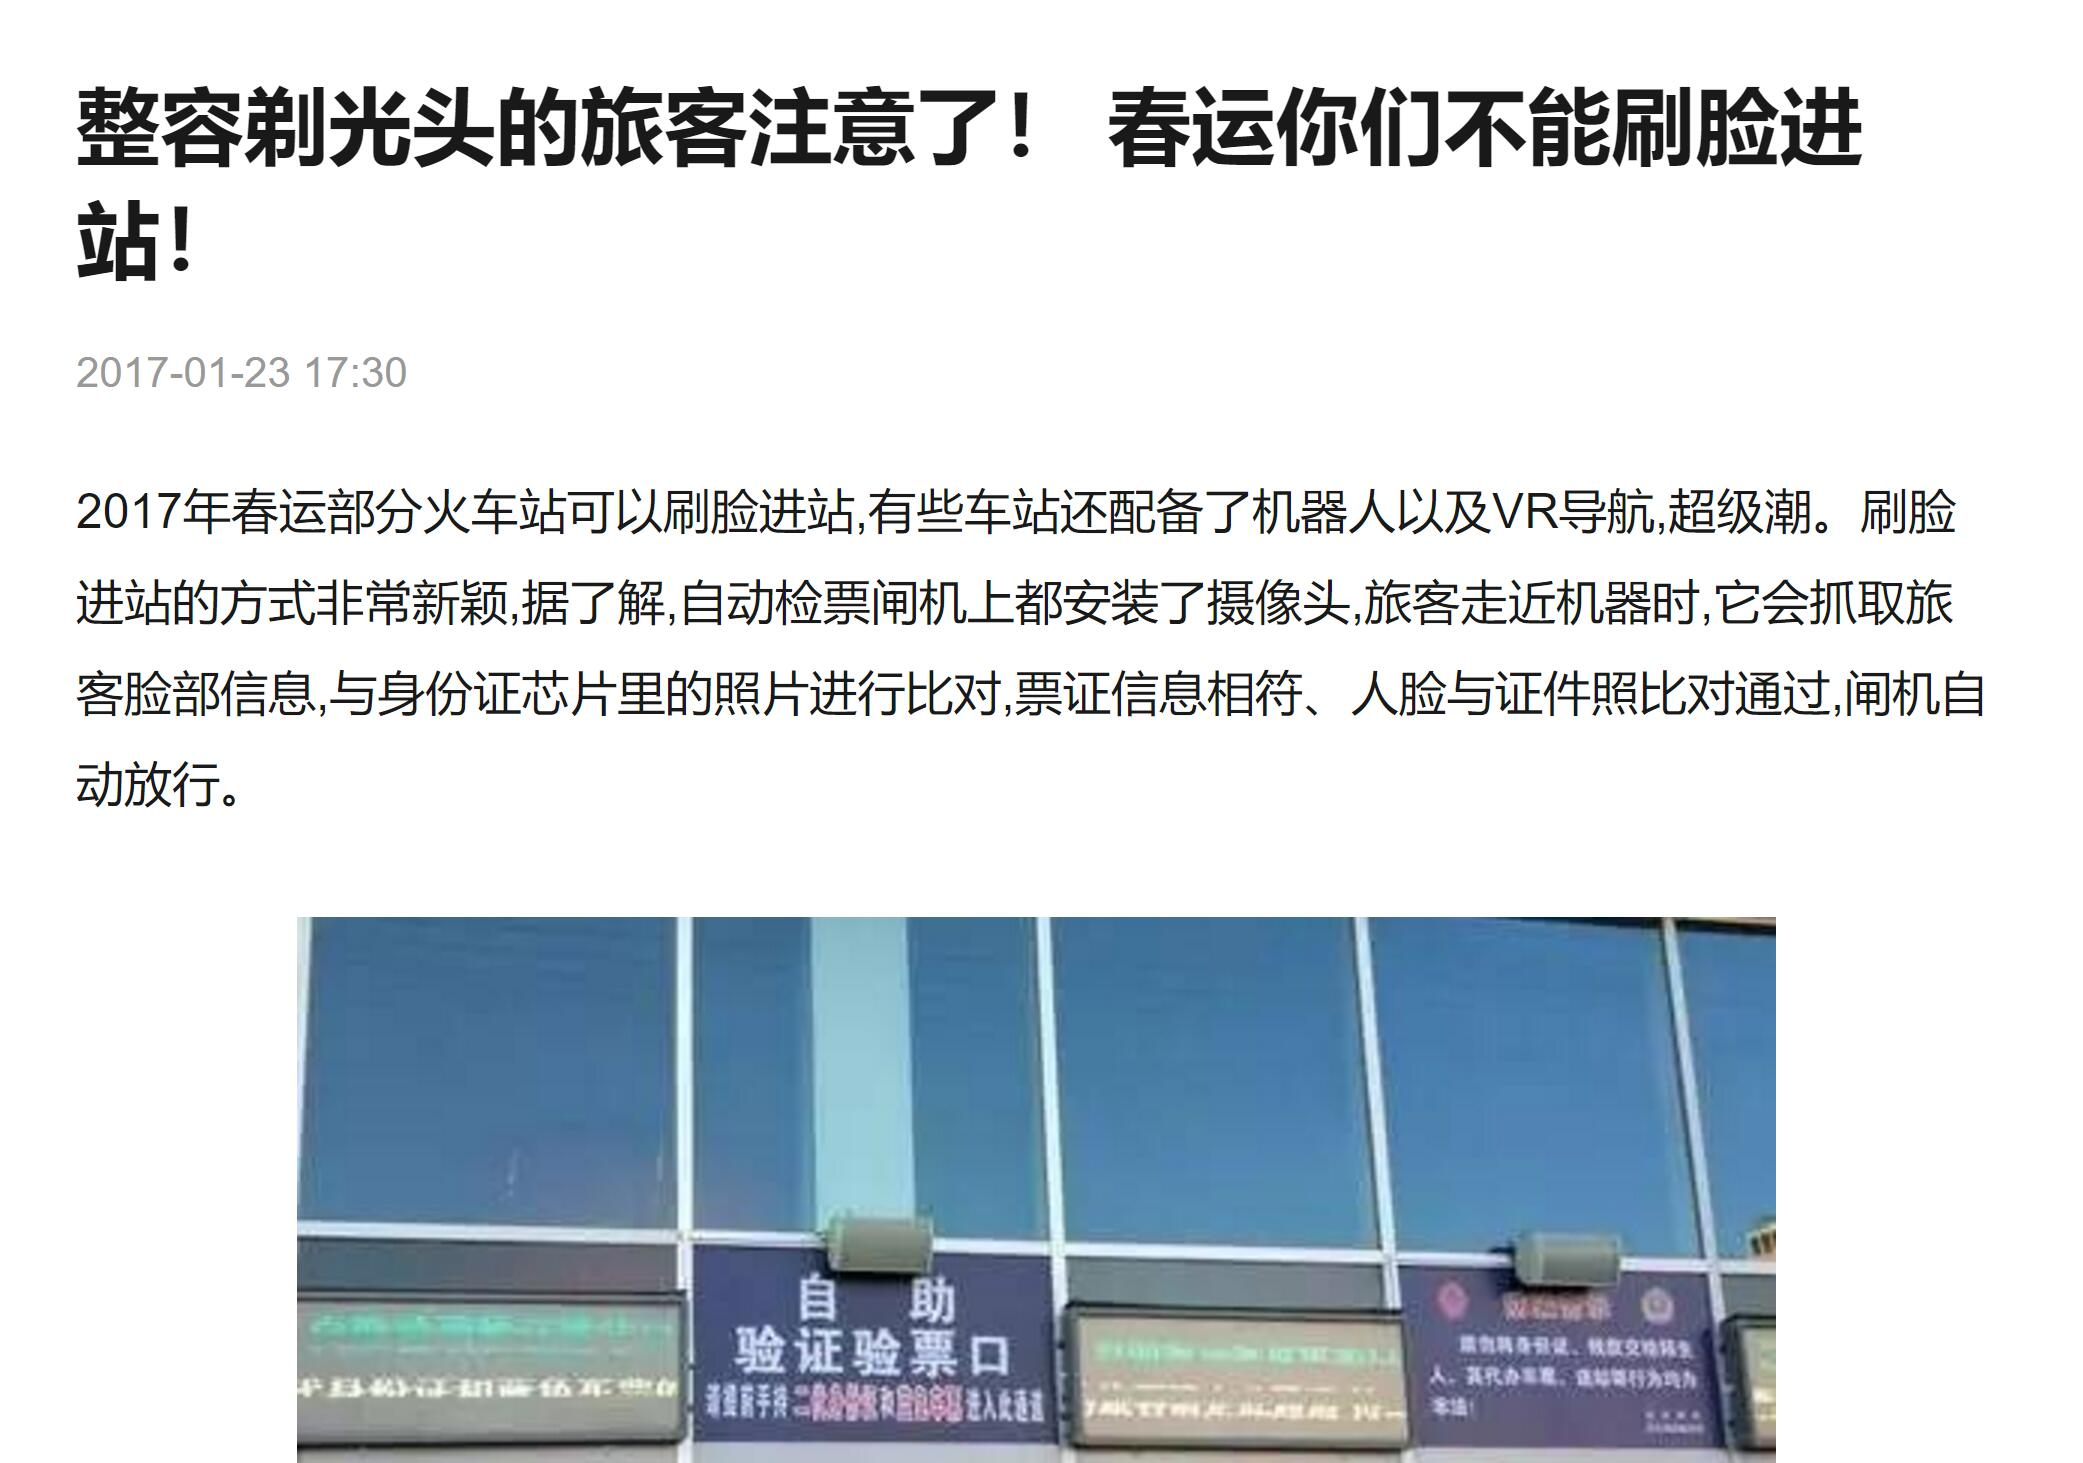

# 0. 上帝说：“要有光”,  于是有了光头。

## Large-scale CelebFaces Attributes (CelebA) Dataset
http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
celeb_attrs = pd.read_csv('dataset/celeba/list_attr_celeba.txt', sep='\s+', skiprows=1)

In [ ]:
celeb_attrs.head()

In [ ]:
celeb_attrs[celeb_attrs==-1] = 0

In [ ]:
celeb_attrs.describe()

In [ ]:
nb_samples = celeb_attrs.shape[0]

In [ ]:
nb_samples

In [ ]:
balds = celeb_attrs[celeb_attrs['Bald']==1]

In [ ]:
nb_balds = balds.shape[0]
nb_balds

In [ ]:
hairs = celeb_attrs[celeb_attrs['Bald']==0].sample(10000-nb_balds, random_state=0)

In [ ]:
bald_file_names = list(balds.index)
hair_file_names = list(hairs.index)
selected_files = bald_file_names + hair_file_names

In [ ]:
bald_file_names

# 1.司图

In [ ]:
img_base_dir = 'dataset/celeba/img_align_celeba/'

In [ ]:
plt.figure(figsize=(15,10))

for i, file_name in enumerate(bald_file_names[:15]):
    
    plt.subplot(3,5,i+1)
    plt.imshow(plt.imread(img_base_dir + file_name))
    plt.title(file_name)

In [ ]:
odom = plt.imread(img_base_dir + bald_file_names[14])

In [ ]:
odom.shape

In [ ]:
plt.figure(figsize=(15,10))

for i, file_name in enumerate(hair_file_names[:15]):
    
    plt.subplot(3,5,i+1)
    plt.imshow(plt.imread(img_base_dir + file_name))
    plt.title(file_name)

In [ ]:
X = [0 for i in range(10000)]

In [ ]:
y = np.zeros(10000)

In [ ]:
from tqdm import tqdm

In [ ]:
for i in tqdm(range(10000)):
    file_name, label = selected_files[i], celeb_attrs.loc[selected_files[i]]['Bald']
    X[i], y[i] = plt.imread(img_base_dir + file_name), label

In [ ]:
X = np.stack(X, axis=0)

In [ ]:
plt.imshow(X[-1])

In [ ]:
np.savez_compressed('celeba_bald.npz', data=X, labels=y)

# 2. 训练/测试集划分

In [ ]:
#X, y = np.load('celeba_bald.npz')['data'], np.load('celeba_bald.npz')['labels']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

# 3. 钻出一个光头

In [ ]:
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
X_train = X_train / 255.
X_valid = X_valid / 255.

In [ ]:
batch_size = 64
nb_classes = 2
nb_epoch = 5
nb_filters = [32, 32, 64, 64]
pool_size = (2,2)
kernel_size = (3,3)

In [ ]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_valid = np_utils.to_categorical(y_valid, nb_classes)

In [ ]:
y_train

In [ ]:
model = Sequential()

model.add(Conv2D(nb_filters[0], kernel_size, padding='same', input_shape=X_train.shape[1:], activation='relu'))

model.add(Conv2D(nb_filters[1], kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(0.25))


model.add(Conv2D(nb_filters[2], kernel_size, padding='same',  activation='relu'))
model.add(Conv2D(nb_filters[3], kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
#best_model = ModelCheckpoint('bald_recog.h5', monitor='val_loss', verbose=0, save_best_only=True)
#tb = TensorBoard(log_dir='./logs')

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, 
          validation_data=(X_valid, y_valid))

In [ ]:
X_test = np.stack([plt.imread('dataset/test/xiaoming_hair.jpg'), plt.imread('dataset/test/xiaoming_bald.jpg')], axis=0)

In [ ]:
plt.imshow(X_test[0])

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test, verbose=1)

# 4. 葛优 vs. 陈佩斯

In [ ]:
Xb = [0 for i in range(100)]
X_test = [0 for i in range(10)]

In [ ]:
yb = np.append(np.zeros(50), np.ones(50))
y_test = np.append(np.zeros(5), np.ones(5))

In [ ]:
import os
img_lst = os.listdir('dataset/forehead/0') +  os.listdir('dataset/forehead/1')

In [ ]:
for i in tqdm(range(100)):
    if i < 50:
        Xb[i] = plt.imread('dataset/forehead/0/' + img_lst[i])
       
    else:
        Xb[i] = plt.imread('dataset/forehead/1/' + img_lst[i-50])

In [ ]:
for i in tqdm(range(10)):
    if i < 5:
        X_test[i] = plt.imread('dataset/test/0/{}.jpg'.format(i))
       
    else:
        X_test[i] = plt.imread('dataset/test/1/{}.jpg'.format(i-5))

In [ ]:
Xb = np.stack(Xb, axis=0)
X_test = np.stack(X_test, axis=0)

In [ ]:
batch_size = 100
nb_classes = 2
nb_epoch = 50
nb_filters = [32, 32, 64, 64]
pool_size = (2,2)
kernel_size = (3,3)

In [ ]:
Xb = Xb / 255.
X_test = X_test / 255.

yb = np_utils.to_categorical(yb, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(nb_filters[0], kernel_size, padding='same', input_shape=Xb.shape[1:], activation='relu'))

model.add(Conv2D(nb_filters[1], kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(0.25))

#model.add(Conv2D(nb_filters[2], kernel_size, padding='same',  activation='relu'))
#model.add(Conv2D(nb_filters[3], kernel_size, activation='relu'))
#model.add(MaxPool2D(pool_size=pool_size))
#model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model.fit(Xb, yb, batch_size=batch_size, epochs=nb_epoch, verbose=1)

In [ ]:
model.predict(X_test)

In [ ]:
y_test